### Use Case

#### A developer interest in renovating properties in King County Washington is interested in what home features would yield a high price.

In [184]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import scipy.stats as ss
import statsmodels.formula.api as sm
import seaborn as sns

In [185]:
%matplotlib inline

In [186]:
#import data
kc_house = pd.read_csv('kc_house_data.csv')

In [187]:
kc_house.head(20)

id             date      price  bedrooms  bathrooms  sqft_living  \
0   7129300520  20141013T000000   221900.0         3       1.00         1180   
1   6414100192  20141209T000000   538000.0         3       2.25         2570   
2   5631500400  20150225T000000   180000.0         2       1.00          770   
3   2487200875  20141209T000000   604000.0         4       3.00         1960   
4   1954400510  20150218T000000   510000.0         3       2.00         1680   
5   7237550310  20140512T000000  1225000.0         4       4.50         5420   
6   1321400060  20140627T000000   257500.0         3       2.25         1715   
7   2008000270  20150115T000000   291850.0         3       1.50         1060   
8   2414600126  20150415T000000   229500.0         3       1.00         1780   
9   3793500160  20150312T000000   323000.0         3       2.50         1890   
10  1736800520  20150403T000000   662500.0         3       2.50         3560   
11  9212900260  20140527T000000   468000.0         2       1.00         1160   
12   114101516  20140528T000000   310000.0         3       1.00         1430   
13  6054650070  20141007T000000   400000.0         3       1.75         1370   
14  1175000570  20150312T000000   530000.0         5       2.00         1810   
15  9297300055  20150124T000000   650000.0         4       3.00         2950   
16  1875500060  20140731T000000   395000.0         3       2.00         1890   
17  6865200140  20140529T000000   485000.0         4       1.00         1600   
18    16000397  20141205T000000   189000.0         2       1.00         1200   
19  7983200060  20150424T000000   230000.0         3       1.00         1250   

    sqft_lot  floors  waterfront  view     ...      grade  sqft_above  \
0       5650     1.0           0     0     ...          7        1180   
1       7242     2.0           0     0     ...          7        2170   
2      10000     1.0           0     0     ...          6         770   
3       5000     1.0           0     0     ...          7        1050   
4       8080     1.0           0     0     ...          8        1680   
5     101930     1.0           0     0     ...         11        3890   
6       6819     2.0           0     0     ...          7        1715   
7       9711     1.0           0     0     ...          7        1060   
8       7470     1.0           0     0     ...          7        1050   
9       6560     2.0           0     0     ...          7        1890   
10      9796     1.0           0     0     ...          8        1860   
11      6000     1.0           0     0     ...          7         860   
12     19901     1.5           0     0     ...          7        1430   
13      9680     1.0           0     0     ...          7        1370   
14      4850     1.5           0     0     ...          7        1810   
15      5000     2.0           0     3     ...          9        1980   
16     14040     2.0           0     0     ...          7        1890   
17      4300     1.5           0     0     ...          7        1600   
18      9850     1.0           0     0     ...          7        1200   
19      9774     1.0           0     0     ...          7        1250   

    sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0               0      1955             0    98178  47.5112 -122.257   
1             400      1951          1991    98125  47.7210 -122.319   
2               0      1933             0    98028  47.7379 -122.233   
3             910      1965             0    98136  47.5208 -122.393   
4               0      1987             0    98074  47.6168 -122.045   
5            1530      2001             0    98053  47.6561 -122.005   
6               0      1995             0    98003  47.3097 -122.327   
7               0      1963             0    98198  47.4095 -122.315   
8             730      1960             0    98146  47.5123 -122.337   
9               0      2003             0    98038  47.3684 -122.031   
10   

In [188]:
kc_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [189]:
kc_house.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Initial data set prep

In [190]:
#add counts column for easy analysis
kc_house['counts'] = 1

In [191]:
#add column to indicate if a house has been renovated
kc_house['renovated'] = kc_house['yr_renovated'] > 0

In [192]:
#DETERMINE WHAT 0-4 views mean
kc_house.view.unique()

array([0, 3, 4, 2, 1])

### Data Exploration

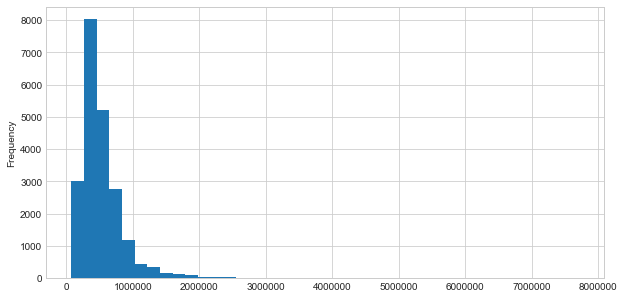

In [193]:
kc_house.loc[:,'price'].plot.hist(bins = 40, figsize=(10, 5))

In [194]:
kc_house.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [195]:
import seaborn as sns
fig = plt.figure(figsize=(10,10)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
sns.kdeplot(kc_house.loc[:, 'price'], ax = ax)
ax.set_title('KDE plot of auto price') # Give the plot a main title
ax.set_xlabel('Auto price') # Set text for the x axis
ax.set_ylabel('Density')# Set text for y axis

Text(0,0.5,'Density')

(100000, 8000000.0)

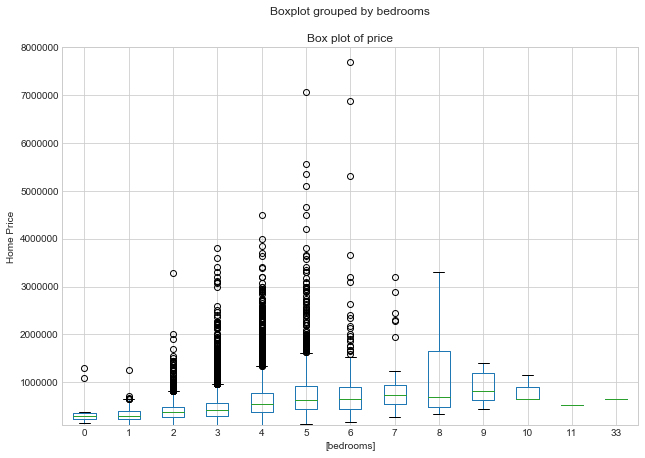

In [196]:
fig = plt.figure(figsize=(10, 7)) # Define plot area
ax = fig.gca() # Define axis 
kc_house.loc[:,['price', 'bedrooms']].boxplot(by = 'bedrooms', ax = ax)
ax.set_title('Box plot of price') # Give the plot a main title
ax.set_ylabel('Home Price')# Set text for y axis
ax.set_ylim(100000, 8000000.0) # Set the limits of the y axis

(100000, 8000000.0)

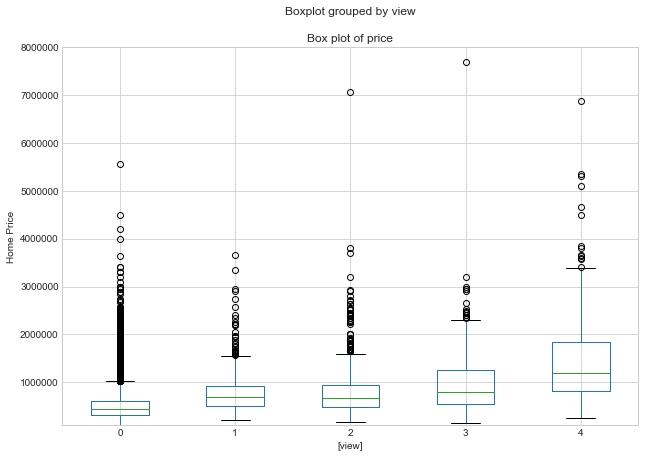

In [197]:
fig = plt.figure(figsize=(10, 7)) # Define plot area
ax = fig.gca() # Define axis 
kc_house.loc[:,['price', 'view']].boxplot(by = 'view', ax = ax)
ax.set_title('Box plot of price') # Give the plot a main title
ax.set_ylabel('Home Price')# Set text for y axis
ax.set_ylim(100000, 8000000.0) # Set the limits of the y axis

In [198]:
kc_house[['bedrooms', 'counts']].groupby(['bedrooms']).agg('count').sort_values('counts', ascending=False)

counts
bedrooms        
3           9824
4           6882
2           2760
5           1601
6            272
1            199
7             38
0             13
8             13
9              6
10             3
11             1
33             1

In [199]:
ax = plt.figure(figsize=(10, 10)).gca() # define axis
kc_house.plot.scatter(x = 'sqft_living', y = 'price', ax = ax, alpha = 0.2)
ax.set_title('House Price vs Sqft Living Space') # Give the plot a main title
ax.set_ylabel('House Price')# Set text for y axis
ax.set_xlabel('Sqft Living Space')

Text(0.5,0,'Sqft Living Space')

Text(0.5,0,'Year Built')

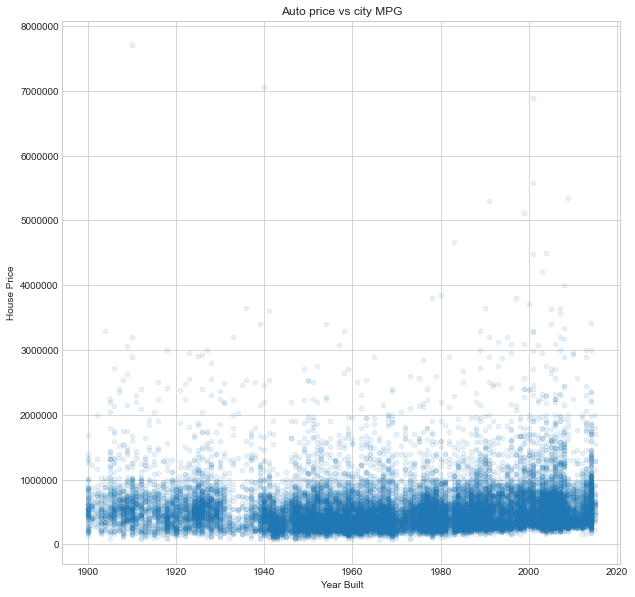

In [200]:
ax = plt.figure(figsize=(10, 10)).gca() # define axis
kc_house.plot.scatter(x = 'yr_built', y = 'price', ax = ax, alpha = 0.1)
ax.set_title('Auto price vs city MPG') # Give the plot a main title
ax.set_ylabel('House Price')# Set text for y axis
ax.set_xlabel('Year Built')

Text(0.5,1,'House Price vs. Year Built \n with renovation by color')

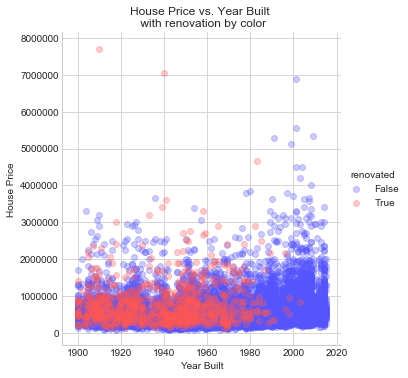

In [201]:
sns.lmplot(x = 'yr_built', y = 'price', 
           data = kc_house, 
           hue = "renovated", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           fit_reg = False)
plt.xlabel('Year Built')
plt.ylabel('House Price')
plt.title('House Price vs. Year Built \n with renovation by color')

In [202]:
import pandas as pd
kc_house.loc[:, 'price_bin'] = pd.cut(kc_house.loc[:, 'price'], bins = 25, labels = range(25))
kc_house.loc[:, 'price_bin'].head(10)

0    0
1    1
2    0
3    1
4    1
5    3
6    0
7    0
8    0
9    0
Name: price_bin, dtype: category
Categories (25, int64): [0 < 1 < 2 < 3 ... 21 < 22 < 23 < 24]

In [203]:
zipcode_price = pd.crosstab(kc_house.loc[:, 'price_bin'], kc_house.loc[:, 'zipcode'])
num_cars = zipcode_price.apply(sum, axis = 0)
zipcode_price = zipcode_price.div(num_cars, axis = 1)
print(zipcode_price.head(10))

zipcode       98001     98002     98003     98004     98005     98006  \
price_bin                                                               
0          0.878453  0.994975  0.878571  0.000000  0.000000  0.038153   
1          0.118785  0.005025  0.110714  0.085174  0.345238  0.357430   
3          0.002762  0.000000  0.010714  0.321767  0.511905  0.359438   
6          0.000000  0.000000  0.000000  0.148265  0.095238  0.124498   
2          0.000000  0.000000  0.000000  0.157729  0.017857  0.060241   
4          0.000000  0.000000  0.000000  0.141956  0.023810  0.034137   
7          0.000000  0.000000  0.000000  0.056782  0.005952  0.004016   
9          0.000000  0.000000  0.000000  0.031546  0.000000  0.012048   
5          0.000000  0.000000  0.000000  0.012618  0.000000  0.002008   
16         0.000000  0.000000  0.000000  0.015773  0.000000  0.004016   

zipcode       98007     98008  98010     98011    ...        98146     98148  \
price_bin                                  

In [204]:
ax = plt.figure(figsize=(15, 7)).gca() # define axis
ax.pcolor(zipcode_price, cmap = 'Blues')
ax.set_xticks(range(zipcode_price.shape[1]))
ax.set_xticklabels(zipcode_price.columns, rotation=90)
ax.set_xlabel('Zipcode')
ax.set_ylabel('Price bin')
ax.set_title('Price ranges of houses by zipcode')

Text(0.5,1,'Price ranges of houses by zipcode')

#### PART 2

#### Summary Statistics related to price of renovated and non-renovated properties.

In [205]:
#create log price
kc_house['log_price'] = np.log(kc_house.price)

In [206]:
#create price and log_price lists
norm1 = kc_house.price.tolist()
norm2 = kc_house.log_price.tolist()

In [207]:
### Compare using Q-Q plot 
def qq_plot(vec1, vec2):
    plt.figure(figsize=(10, 10)).gca() # define axis
    ax1 = plt.subplot(221) ## setup the left subplot
    ss.probplot(vec1, plot = ax1) ## Plot the left subplot
    ax1 = plt.subplot(222) ## Set up the right subplot
    ss.probplot(vec2, plot = ax1) ## Plot the right subplot
qq_plot(norm1, norm2) 

Text(0.5,1,'Q-Q plot of two distributions')

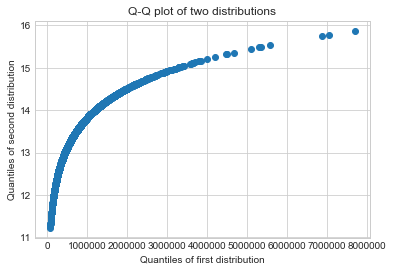

In [208]:
#Price and log-price
#test if two samples have similar distributions using the same plot
plt.scatter(x = sorted(norm1), y = sorted(norm2))
plt.xlabel('Quantiles of first distribution')
plt.ylabel('Quantiles of second distribution')
plt.title('Q-Q plot of two distributions')

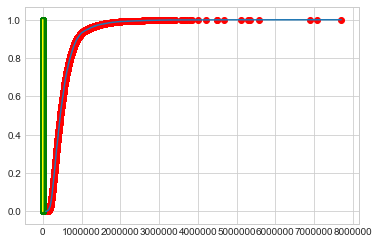

In [209]:
# plot the cumulative distribution functions of the two samples
def plot_cums(dist1, dist2):
    ## sort the first data sample:
    data_sorted = np.sort(dist1)
    
    # calculate the proportional values of samples
    p = 1. * np.arange(len(dist1)) / (len(dist1) - 1)

    # Now plot as line and scatter plot. 
    plt.plot(data_sorted, p)
    plt.scatter(data_sorted, p, color = 'red')
    
    # sort the seond data sample:
    data_sorted = np.sort(dist2)
    
    # And the second plot
    plt.plot(data_sorted, p, color = 'yellow')
    plt.scatter(data_sorted, p, color = 'green')

plot_cums(norm1, norm2)   

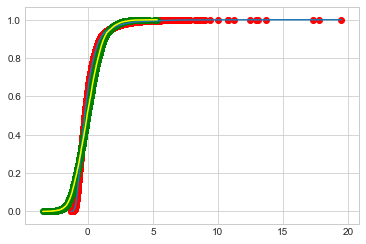

In [210]:
#Price and log-price
#standardize (zero mean, unit standard deviation) the two samples and plot the cumulative distribution function
from sklearn.preprocessing import scale
norm1_s = scale(norm1)
norm2_s = scale(norm2)
plot_cums(norm1_s, norm2_s)

In [211]:
#compute the K-S statistic, maximum vertical distance between the two cumulative density functions, and the p-valu
def ks_test(dat, dist = 'norm'):
    from scipy.stats import kstest 
    ks_statisic, pvalue = kstest(dat, dist)
    print('KS-statistic = ' + str(ks_statisic))
    print('P-value = ' + str(pvalue))
print('K-S Statistic Price')
ks_test(norm1_s)
print("\n")
print('K-S Statistic Log price')
ks_test(norm2_s)


K-S Statistic Price
KS-statistic = 0.1457271152901709
P-value = 0.0


K-S Statistic Log price
KS-statistic = 0.025988070503970062
P-value = 4.1903563850987136e-13


In [212]:
#understand mean and counts
def count_mean(dat):
    groups = dat.groupby('renovated') # Create the groups
    ## Create a data frame with the counts and the means of the groups
    return pd.DataFrame({'count': groups.size(), 
                        'mean': groups.aggregate(np.mean).loc[:, 'price']})
count_mean(kc_house)

count           mean
renovated                      
False      20699  530360.818155
True         914  760379.029540

In [213]:
#create histograms
def hist_plot(vec, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

In [214]:
#define t-test
def t_test(a, b, alpha, alternative='two-sided'):
    from scipy import stats
    import scipy.stats as ss
    import pandas as pd
    import statsmodels.stats.weightstats as ws
    
    diff = a.mean() - b.mean()

    res = ss.ttest_ind(a, b)
      
    means = ws.CompareMeans(ws.DescrStatsW(a), ws.DescrStatsW(b))
    confint = means.tconfint_diff(alpha=alpha, alternative=alternative, usevar='unequal') 
    degfree = means.dof_satt()

    index = ['DegFreedom', 'Difference', 'Statistic', 'PValue', 'Low95CI', 'High95CI']
    return pd.Series([degfree, diff, res[0], res[1], confint[0], confint[1]], index = index)

In [215]:
#assign values for fuel type 
reno = kc_house.loc[kc_house.loc[:, 'renovated'] == True, 'price']
noreno = kc_house.loc[kc_house.loc[:, 'renovated'] == False, 'price']

In [216]:
#define plot
def hist_mean_ci(vec, t_test, bins):
    import matplotlib.pyplot as plt
    from statistics import mean
    upper = mean(vec) + t_test[5] - t_test[1]
    lower = mean(vec) + t_test[4] - t_test[1]
    plt.hist(vec, bins = bins)
    plt.axvline(mean(vec), color = 'red')
    plt.axvline(upper, color = 'red', linestyle='--')
    plt.axvline(lower, color = 'red', linestyle='--')
    plt.ylabel('Frequency')
    plt.xlabel('Value')

DegFreedom    9.398643e+02
Difference    2.300182e+05
Statistic     1.868556e+01
PValue        2.640149e-77
Low95CI       1.902809e+05
High95CI      2.697555e+05
dtype: float64


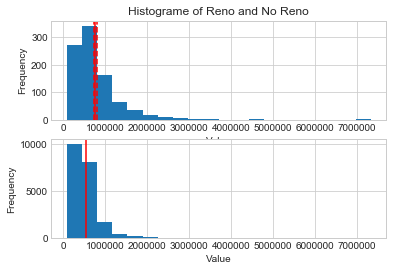

In [217]:
test_fuel = t_test(reno, noreno, alpha = 0.05)
print(test_fuel)
def plot_t_fuel(a, b, t_test, cols=['Reno', 'No Reno'], nbins = 20):
    import matplotlib.pyplot as plt
    minx = min([min(a), min(b)])
    maxx = max([max(a), max(b)])
    stepx = (maxx - minx)/(nbins + 1)
    bins = [minx + i * stepx for i in range(nbins + 1)]
    plt.subplot(2, 1, 1) # The first plot
    hist_mean_ci(a, t_test, bins)
    plt.title('Histograme of ' + cols[0] + ' and ' + cols[1])
    plt.subplot(2, 1, 2) # The next plot
    hist_plot(b, bins)
plot_t_fuel(reno, noreno, test_fuel) 

#### Bootstrap

In [218]:
reno = kc_house[kc_house['renovated'] == True]
noreno = kc_house[kc_house['renovated'] == False]

print(len(reno), len(noreno))

914 20699


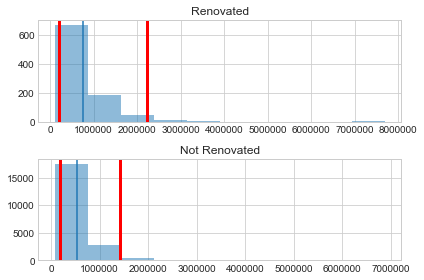

In [219]:
def plot_hist(x, p=5):
    # Plot the distribution and mark the mean
    plt.hist(x, alpha=.5)
    plt.axvline(x.mean())
    # 95% confidence interval    
    plt.axvline(np.percentile(x, p/2.), color='red', linewidth=3)
    plt.axvline(np.percentile(x, 100-p/2.), color='red', linewidth=3)
    
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pd.concat([a, b])
    breaks = np.linspace(
        combined.min(), 
        combined.max(), 
        num=nbins+1)

    plt.subplot(2, 1, 1)
    plot_hist(a)
    plt.title(a_label)
    
    plt.subplot(2, 1, 2)
    plot_hist(b)
    plt.title(b_label)
    
    plt.tight_layout()
    

plot_dists(reno.price, noreno.price, 20, a_label='Renovated', b_label='Not Renovated')

#### PART 3 - Linear Model

In [220]:
# Subset the data with a Boolean Flag
isReno = kc_house.loc[:,"renovated"] == True

# Create just the male dataframe
renovated_only = kc_house[isReno].copy()

# Preview the new dataframe
renovated_only.head()

id             date      price  bedrooms  bathrooms  sqft_living  \
1    6414100192  20141209T000000   538000.0         3       2.25         2570   
35   9547205180  20140613T000000   696000.0         3       2.50         2300   
95   1483300570  20140908T000000   905000.0         4       2.50         3300   
103  2450000295  20141007T000000  1088000.0         3       2.50         2920   
115  3626039325  20141121T000000   740500.0         3       3.50         4380   

     sqft_lot  floors  waterfront  view    ...      yr_renovated  zipcode  \
1        7242     2.0           0     0    ...              1991    98125   
35       3060     1.5           0     0    ...              2002    98115   
95      10250     1.0           0     0    ...              1991    98040   
103      8113     2.0           0     0    ...              2010    98004   
115      6350     2.0           0     0    ...              1999    98117   

         lat     long  sqft_living15  sqft_lot15  counts  renovated  \
1    47.7210 -122.319           1690        7639       1       True   
35   47.6827 -122.310           1590        3264       1       True   
95   47.5873 -122.249           1950        6045       1       True   
103  47.5814 -122.196           2370        8113       1       True   
115  47.6981 -122.368           1830        6350       1       True   

     price_bin  log_price  
1            1  13.195614  
35           2  13.453105  
95           2  13.715690  
103          3  13.899852  
115          2  13.515081  

[5 rows x 25 columns]

In [221]:
# Create new data frame for new feature set.
reno_df = renovated_only.copy()

# Drop columns for family, gender, kids.
Obsolete = ["waterfront", 
            "date", 
            "lat", 
            "long", 
            "price_bin", 
            "renovated",
            "id","view", 
            'condition', 
            'yr_built',
            'yr_renovated',
            'counts',
            'grade',
            'sqft_above',
            'sqft_basement',
            'sqft_living15',
            'sqft_lot15',
            'log_price',
            'zipcode']
for x in Obsolete:
    reno_df = reno_df.drop(x, axis=1)
    
# Reset the index.
reno_df=reno_df.reset_index(drop=True)

# Preview the data.
reno_df.head()

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors
0   538000.0         3       2.25         2570      7242     2.0
1   696000.0         3       2.50         2300      3060     1.5
2   905000.0         4       2.50         3300     10250     1.0
3  1088000.0         3       2.50         2920      8113     2.0
4   740500.0         3       3.50         4380      6350     2.0

In [222]:
# Scale everything but price
# Create a scale function for a column in a pandas df.
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

# Add scaled x to data frame.
reno_df['bedrooms'] = scale(reno_df['bedrooms'])
reno_df['bathrooms'] = scale(reno_df['bathrooms'])
reno_df['sqft_living'] = scale(reno_df['sqft_living'])
reno_df['sqft_lot'] = scale(reno_df['sqft_lot'])
reno_df['floors'] = scale(reno_df['floors'])

Intercept, Slopes : 
Intercept      760379.029540
bedrooms      -102245.237561
bathrooms       23032.215811
sqft_living    527446.493530
sqft_lot       -59375.257770
floors         -13365.877417
dtype: float64
Intercept t-value, Slope t-values: 
Intercept      63.528508
bedrooms       -6.815994
bathrooms       1.145854
sqft_living    27.522120
sqft_lot       -4.887740
floors         -0.994376
dtype: float64

Hypothesis test summary for each coefficient if they differ from zero:
Intercept       0.000000e+00
bedrooms        1.704816e-11
bathrooms       2.521573e-01
sqft_living    9.702930e-122
sqft_lot        1.205650e-06
floors          3.203048e-01
dtype: float64

SSE, SST, SSR, and RMSE:
SSE: 218316187443996.22
SST: 337208832830304.2
SSR: 118892645386307.97
RMSE: 6607816.393393451
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.647
Model:                            OLS   Adj. R-sq

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Residual Histogram')

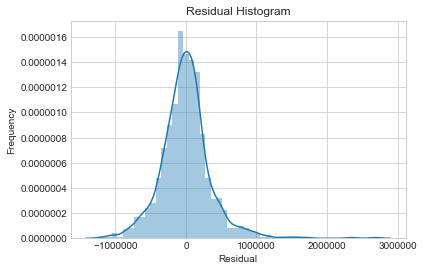

In [223]:
ols_model = sm.ols(formula = 'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + 1', data=reno_df)

results = ols_model.fit()
n_points = reno_df.shape[0]
y_output = reno_df['price'].values.reshape(n_points, 1)

# Get slope (m) and y-intercept (b)
print('Intercept, Slopes : \n{}'.format(results.params))

# Get the t-values (hypothesis test statistics) for linear regression coefficient hypothesis tests.
print('Intercept t-value, Slope t-values: \n{}'.format(results.tvalues))

# Get p-values for above t-value statistics
print('\nHypothesis test summary for each coefficient if they differ from zero:')
print(results.pvalues)

print('\nSSE, SST, SSR, and RMSE:')
mean_y = np.mean(y_output)
sst = np.sum((y_output - mean_y)**2)
sse = sst - results.ssr
print('SSE: {}'.format(sse))
print('SST: {}'.format(sst))
print('SSR: {}'.format(results.ssr))
print('RMSE: {}'.format(np.sqrt(results.mse_model)))

# Get most of the linear regression statistics we are interested in:
print(results.summary())

# Plot a histogram of the residuals
sns.distplot(results.resid, hist=True)
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Residual Histogram')